## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

## Data Cleaning and Feature Engineering

In [2]:
tesla = pd.read_csv('TSLA.csv')

In [3]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000


In [4]:
ethereum = pd.read_csv('ETH-USD.csv')

In [5]:
bitcoin = pd.read_csv('BTC-USD.csv')

In [6]:
dogecoin = pd.read_csv('DOGE-USD.csv')

In [7]:
Closing = pd.DataFrame()  

In [8]:
Closing['Date']=tesla['Date']

In [9]:
Closing['Tesla_Closing']=tesla['Close']

In [10]:
Closing['Ethereum_Closing']=ethereum['Close']

In [11]:
Closing['Bitcoin_Closing']=bitcoin['Close']

In [12]:
Closing['Dogecoin_Closing']=dogecoin['Close']

In [13]:
Closing.head()

,Date,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_Closing
0,2018-01-02,64.106003,772.640991,13657.200195,0.008909
1,2018-01-03,63.450001,884.443970,14982.099609,0.009145
2,2018-01-04,62.924000,962.719971,15201.000000,0.009320
3,2018-01-05,63.316002,980.921997,15599.200195,0.009644
4,2018-01-08,67.281998,997.719971,17429.500000,0.012167


In [14]:
Closing.tail()

,Date,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_Closing
852,2021-05-21,580.880005,215.325378,8988.596680,0.002549
853,2021-05-24,606.440002,210.933151,8897.468750,0.002510
854,2021-05-25,604.690002,208.174011,8912.654297,0.002481
855,2021-05-26,619.130005,206.774399,9003.070313,0.002484
856,2021-05-27,630.849976,204.055786,9268.761719,0.002529


In [15]:
Closing = Closing.set_index('Date')

In [16]:
Closing.head()

,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_Closing
Date,,,,
2018-01-02,64.106003,772.640991,13657.200195,0.008909
2018-01-03,63.450001,884.443970,14982.099609,0.009145
2018-01-04,62.924000,962.719971,15201.000000,0.009320
2018-01-05,63.316002,980.921997,15599.200195,0.009644
2018-01-08,67.281998,997.719971,17429.500000,0.012167


In [17]:
Closing.isnull().sum()

Tesla_Closing       0
Ethereum_Closing    1
Bitcoin_Closing     1
Dogecoin_Closing    1
dtype: int64

In [18]:
Closing = Closing.fillna(axis=0, method='ffill')

In [19]:
Closing.isnull().sum()

Tesla_Closing       0
Ethereum_Closing    0
Bitcoin_Closing     0
Dogecoin_Closing    0
dtype: int64

In [20]:
title = "Line Plot"
xlabel = "Date"
ylabel = "USD"

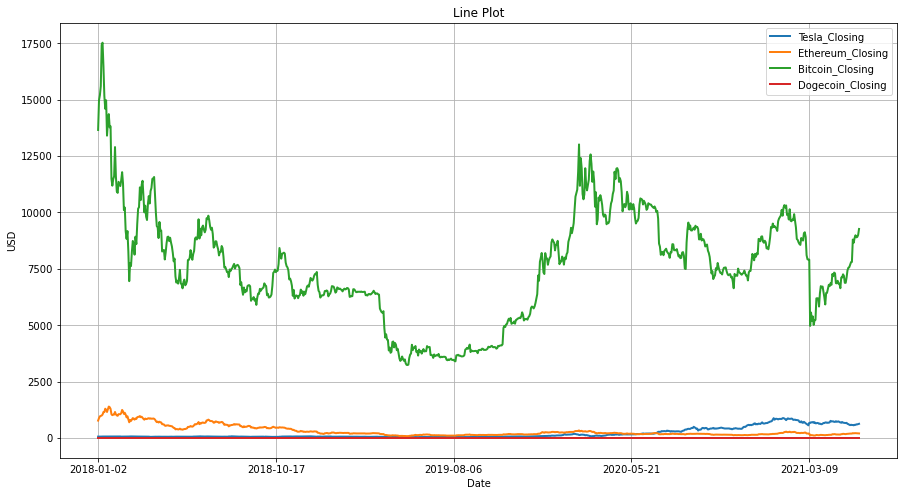

In [21]:
ax = Closing.plot(figsize=(15,8),lw='2',title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Closing_normalized = sc.fit_transform(Closing)

In [23]:
Closing_normalized = pd.DataFrame(Closing_normalized,
                      columns=["Tesla_Closing",
                           "Ethereum_Closing",
                           "Bitcoin_Closing",
                           "Dogecoin_CLosing",
                              ]
                     )

In [24]:
Closing_normalized['Date'] = tesla['Date']

In [25]:
Closing_normalized = Closing_normalized.set_index('Date')

In [26]:
Closing_normalized.head()

,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_CLosing
Date,,,,
2018-01-02,-0.600046,1.859443,2.520918,3.201427
2018-01-03,-0.602841,2.309183,3.069469,3.335655
2018-01-04,-0.605082,2.624056,3.160101,3.435189
2018-01-05,-0.603412,2.697276,3.324968,3.619469
2018-01-08,-0.586515,2.764848,4.082772,5.054464


In [27]:
Closing_normalized.describe()

,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_CLosing
count,8.570000e+02,8.570000e+02,8.570000e+02,8.570000e+02
mean,-1.049336e-16,-6.593973e-17,-5.389181e-17,-1.115405e-16
std,1.000584e+00,1.000584e+00,1.000584e+00,1.000584e+00
min,-7.206669e-01,-9.094490e-01,-1.793479e+00,-9.915112e-01
25%,-6.250971e-01,-6.196652e-01,-5.216680e-01,-5.490118e-01
50%,-5.784966e-01,-4.266247e-01,-3.970969e-02,-3.414125e-01
75%,3.938853e-01,2.930037e-01,6.434252e-01,1.039307e-01
max,2.889173e+00,4.368662e+00,4.123140e+00,7.853358e+00


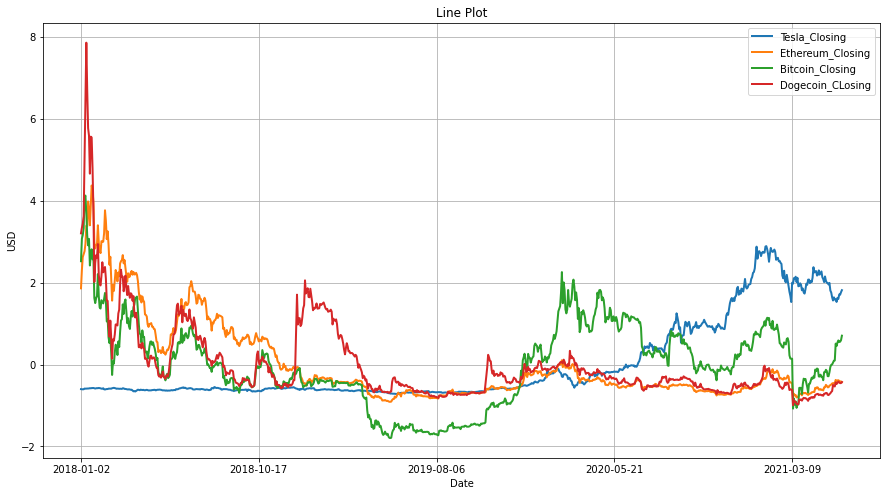

In [28]:
ax = Closing_normalized.plot(figsize=(15,8),lw='2',title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

## Data Exploration

In [29]:
Closing['3-month-SMA'] = Closing['Tesla_Closing'].rolling(window=3).mean()

In [30]:
Closing.index=pd.to_datetime(Closing.index)

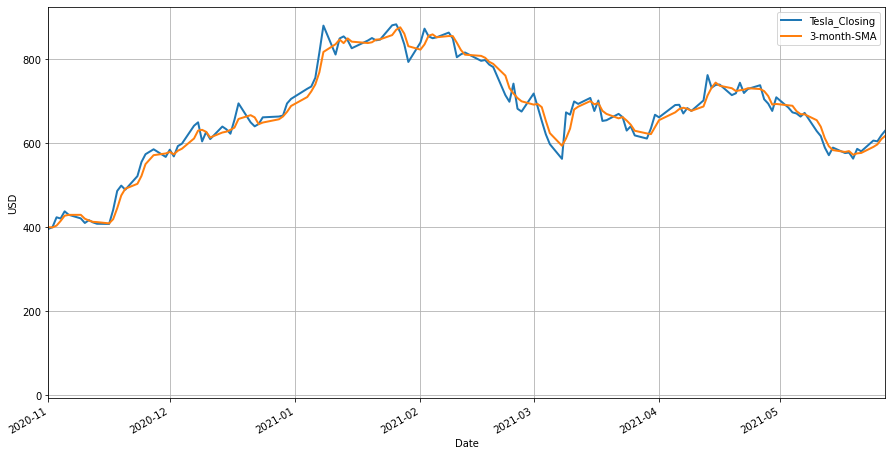

In [31]:
ax=Closing.plot(y=['Tesla_Closing', '3-month-SMA'], figsize=(15,8), xlim=['2020-11-01','2021-05-27'],lw=2)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [32]:
Closing['EWMA12'] = Closing['Tesla_Closing'].ewm(span=3,adjust=False).mean()

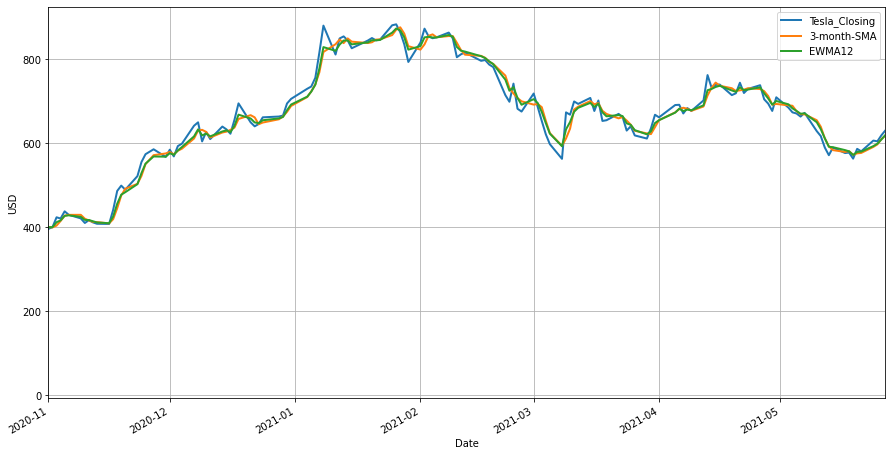

In [33]:
ax=Closing.plot(y=['Tesla_Closing', '3-month-SMA', 'EWMA12'], figsize=(15,8), xlim=['2020-11-01','2021-05-27'],lw=2)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [34]:
Closing=Closing.dropna()

In [35]:
MSA_SMA = mean_squared_error(Closing['Tesla_Closing'],Closing['3-month-SMA'])

In [36]:
MSA_EWMA = mean_squared_error(Closing['Tesla_Closing'],Closing['EWMA12'])

In [37]:
print("Mean squared error of simple moving average function of tesla closing price: ",round(MSA_SMA,2),"USD")
print("Mean squared error of EWMA function of tesla closing price: ",round(MSA_EWMA,2),"USD")

Mean squared error of simple moving average function of tesla closing price:  91.19 USD
Mean squared error of EWMA function of tesla closing price:  54.76 USD


## Prediction

The target is Dogecoin. We are using other stocks to predict the closing price dogecoin.

In [38]:
Closing_normalized['DC(+1)'] = Closing_normalized['Dogecoin_CLosing'].shift(1)

In [39]:
Closing_normalized.head()

,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_CLosing,DC(+1)
Date,,,,,
2018-01-02,-0.600046,1.859443,2.520918,3.201427,NaN
2018-01-03,-0.602841,2.309183,3.069469,3.335655,3.201427
2018-01-04,-0.605082,2.624056,3.160101,3.435189,3.335655
2018-01-05,-0.603412,2.697276,3.324968,3.619469,3.435189
2018-01-08,-0.586515,2.764848,4.082772,5.054464,3.619469


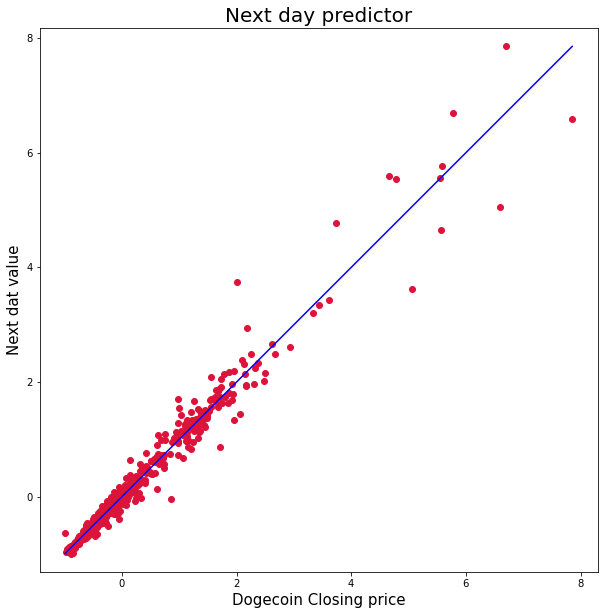

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(Closing_normalized['Dogecoin_CLosing'].values,Closing_normalized['DC(+1)'].values, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(Closing_normalized['Dogecoin_CLosing'].values), max(Closing_normalized['DC(+1)'].values))
p2 = min(min(Closing_normalized['Dogecoin_CLosing'].values), min(Closing_normalized['DC(+1)'].values))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('Dogecoin Closing price', fontsize=15)
plt.ylabel('Next dat value', fontsize=15)
plt.title('Next day predictor',loc = 'center', fontsize=20)
plt.axis('equal')
plt.show()

In [41]:
Residue = Closing_normalized['Dogecoin_CLosing']- Closing_normalized['DC(+1)']

In [42]:
print("Error of next-day predictor Dogecoin: ", np.mean(abs(Residue)))

Error of next-day predictor Dogecoin:  0.0791168472050984


In [43]:
Closing_normalized=Closing_normalized.dropna()

In [44]:
TrainingSet = Closing_normalized.loc['2018-01-02':'2018-12-31']

In [45]:
TrainingSet.tail()

,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_CLosing,DC(+1)
Date,,,,,
2018-12-24,-0.621467,-0.099237,-0.085638,1.131121,1.129415
2018-12-26,-0.595308,-0.314012,-0.321152,0.938878,1.131121
2018-12-27,-0.603795,-0.322524,-0.430316,0.983811,0.938878
2018-12-28,-0.588679,-0.374866,-0.456027,1.152734,0.983811
2018-12-31,-0.589591,-0.452309,-0.555846,1.371709,1.152734


In [46]:
X_train = [TrainingSet['Tesla_Closing'].values, TrainingSet['Ethereum_Closing'].values, TrainingSet['Bitcoin_Closing'].values, TrainingSet['Dogecoin_CLosing'].values]

In [47]:
X_train = np.asarray(X_train)

In [48]:
X_train.shape

(4, 250)

In [49]:
Y_train = np.asarray([TrainingSet['DC(+1)'].values])

In [50]:
Y_train.shape

(1, 250)

In [51]:
regressor = LinearRegression()

In [52]:
regressor.fit(X_train.transpose(),Y_train.transpose())

LinearRegression()

In [53]:
CrossValidationSet = Closing_normalized.loc['2019-01-02':'2019-12-31']

In [54]:
X_CV = np.asarray([CrossValidationSet['Tesla_Closing'].values, CrossValidationSet['Ethereum_Closing'].values, CrossValidationSet['Bitcoin_Closing'].values, CrossValidationSet['Dogecoin_CLosing'].values])

In [55]:
Y_CV = regressor.predict(X_CV.transpose())

In [56]:
Y_CV.shape

(252, 1)

In [57]:
CrossValidationSet = CrossValidationSet.assign(Dogecoin_CV = Y_CV)

In [58]:
CrossValidationSet

,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_CLosing,DC(+1),Dogecoin_CV
Date,,,,,,
2019-01-02,-0.608916,-0.456440,-0.524844,1.449629,1.371709,1.144072
2019-01-03,-0.617232,-0.455817,-0.512903,2.054227,1.449629,1.689105
2019-01-04,-0.602466,-0.504140,-0.516422,1.734012,2.054227,1.399708
2019-01-07,-0.587750,-0.511120,-0.503753,1.805677,1.734012,1.474694
2019-01-08,-0.587418,-0.398394,-0.435226,1.861984,1.805677,1.541904
...,...,...,...,...,...,...
2019-12-24,-0.510815,-0.375085,0.176343,-0.120732,-0.298186,-0.250151
2019-12-26,-0.505967,-0.254388,0.263601,0.015772,-0.120732,-0.106007
2019-12-27,-0.506444,-0.186580,0.131004,-0.063855,0.015772,-0.156836


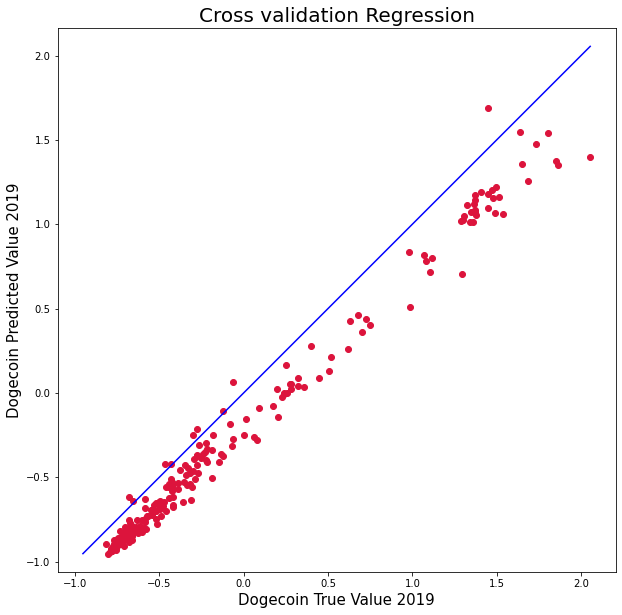

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(CrossValidationSet['DC(+1)'].values,CrossValidationSet['Dogecoin_CV'].values, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(CrossValidationSet['Dogecoin_CV'].values), max(CrossValidationSet['DC(+1)'].values))
p2 = min(min(CrossValidationSet['Dogecoin_CV'].values), min(CrossValidationSet['DC(+1)'].values))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('Dogecoin True Value 2019', fontsize=15)
plt.ylabel('Dogecoin Predicted Value 2019', fontsize=15)
plt.title('Cross validation Regression',loc = 'center', fontsize=20)
plt.axis('equal')
plt.show()

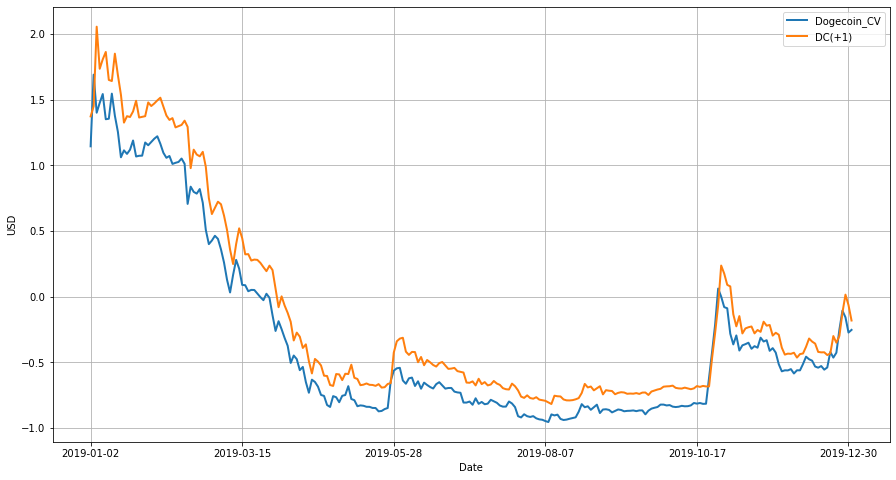

In [62]:
ax=CrossValidationSet.plot(y=['Dogecoin_CV', 'DC(+1)'], figsize=(15,8), lw=2)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [73]:
Residue_CV = CrossValidationSet['Dogecoin_CV']- CrossValidationSet['DC(+1)']

In [76]:
print("Error of Cross-Validation set Dogecoin: ", np.mean(abs(Residue_CV)))

Error of Cross-Validation set Dogecoin:  0.18870023648217993


In [63]:
TestSet = Closing_normalized.loc['2020-01-02':]

In [64]:
X_test = np.asarray([TestSet['Tesla_Closing'].values, TestSet['Ethereum_Closing'].values, TestSet['Bitcoin_Closing'].values, TestSet['Dogecoin_CLosing'].values])

In [65]:
Y_test = regressor.predict(X_test.transpose())

In [66]:
TestSet = TestSet.assign(Dogecoin_test_prediction = Y_test)

In [67]:
TestSet.head()

,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_CLosing,DC(+1),Dogecoin_test_prediction
Date,,,,,,
2020-01-02,-0.506547,-0.197512,0.260505,-0.058167,-0.156564,-0.163397
2020-01-03,-0.495682,-0.235437,0.169674,-0.136088,-0.058167,-0.226086
2020-01-06,-0.488414,-0.221955,0.163472,-0.110494,-0.136088,-0.193978
2020-01-07,-0.473486,-0.264260,0.046192,-0.194102,-0.110494,-0.257450
2020-01-08,-0.453820,-0.259165,0.129736,-0.181589,-0.194102,-0.235655


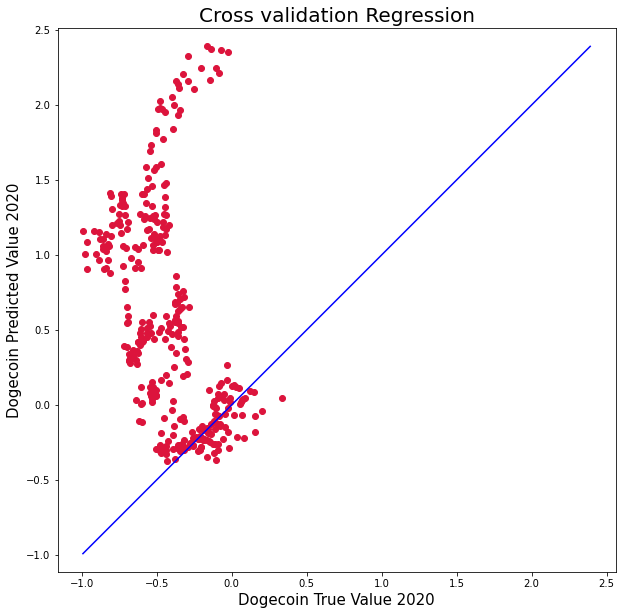

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(TestSet['DC(+1)'].values,TestSet['Dogecoin_test_prediction'].values, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(TestSet['Dogecoin_test_prediction'].values), max(TestSet['DC(+1)'].values))
p2 = min(min(TestSet['Dogecoin_test_prediction'].values), min(TestSet['DC(+1)'].values))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('Dogecoin True Value 2020', fontsize=15)
plt.ylabel('Dogecoin Predicted Value 2020', fontsize=15)
plt.title('Cross validation Regression',loc = 'center', fontsize=20)
plt.axis('equal')
plt.show()

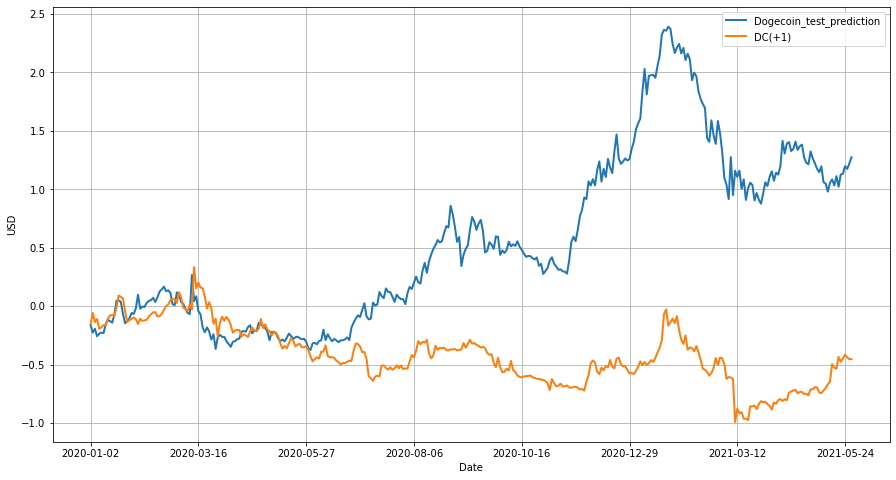

In [70]:
ax=TestSet.plot(y=['Dogecoin_test_prediction', 'DC(+1)'], figsize=(15,8), lw=2)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [81]:
Residue_Test = TestSet['Dogecoin_test_prediction'] - TestSet['DC(+1)']

In [82]:
Residue_Test

Date
2020-01-02   -0.006833
2020-01-03   -0.167918
2020-01-06   -0.057890
2020-01-07   -0.146956
2020-01-08   -0.041553
                ...   
2021-05-21    1.578692
2021-05-24    1.613512
2021-05-25    1.612181
2021-05-26    1.675435
2021-05-27    1.726687
Length: 354, dtype: float64

In [83]:
print("Error of Test set Dogecoin: ", np.mean(abs(Residue_Test)))

Error of Test set Dogecoin:  0.99632125168245


## Adaptive Predictors

In [84]:
Closing_normalized.head()

,Tesla_Closing,Ethereum_Closing,Bitcoin_Closing,Dogecoin_CLosing,DC(+1)
Date,,,,,
2018-01-03,-0.602841,2.309183,3.069469,3.335655,3.201427
2018-01-04,-0.605082,2.624056,3.160101,3.435189,3.335655
2018-01-05,-0.603412,2.697276,3.324968,3.619469,3.435189
2018-01-08,-0.586515,2.764848,4.082772,5.054464,3.619469
2018-01-09,-0.588832,2.941682,4.123140,6.587855,5.054464


In [87]:
X = Closing_normalized.iloc[:,:4]

In [88]:
X.shape

(856, 4)

In [95]:
X = X.values

In [89]:
Y = Closing_normalized['DC(+1)']

In [96]:
Y = Y.values

In [98]:
from sklearn import linear_model

In [100]:
delta = 10
a=[1,1,1,1]
b=[1]
Y_Pred = [1]
Y_True = [1]

for j in range(0,800,delta):
    for i in range(j,5+j):
        a = np.vstack([a, X[i]])
        b = np.vstack([b,Y[i]])
    a= np.delete(a, (0), axis=0)
    b= np.delete(b, (0), axis=0)
    r = linear_model.LinearRegression()
    r.fit(a, b)
    x_t = X[delta+1]
    Y_Pred = np.vstack([Y_Pred,r.predict([x_t])])
    Y_True = np.vstack([Y_True,Y[4+j]])

In [101]:
Adaptive_Residue = Y_Pred - Y_True

In [103]:
mean_absolute_error = np.mean(abs(Adaptive_Residue))
print("Mean absolute of width:",delta," error =",round(mean_absolute_error,2))

Mean absolute of width: 10  error = 5.26


In [107]:
result = pd.DataFrame(Y_True,
                      columns=["Original Value",
                               ],
                     )

In [109]:
result['Predcited'] = Y_Pred

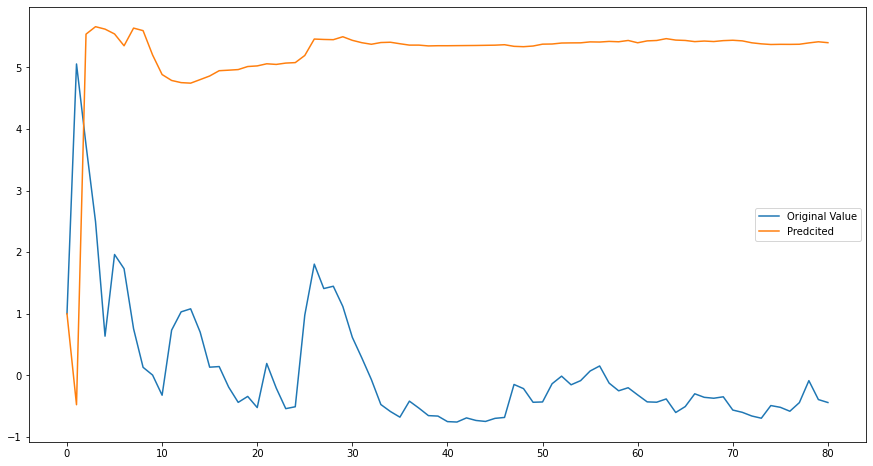

In [110]:
fig=result.plot(figsize=(15,8))